In [1]:
%matplotlib inline

In [2]:
import numpy as np
import json
from sklearn.model_selection import StratifiedShuffleSplit
from WordEmbeding.word_embeding_classifier import WordEmebdingClassifier
from InferSent.classifier import InferSentClassifier,XGBoostClassifier
from TFIDFVector.tfidf_classifier import TFIDFClassifer
from SemHash.semhash_classifier import SemHashClassfier
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
nlu_data ='AskUbuntuCorpus.json'

In [4]:
temp_data = None
with open(nlu_data,'r') as f:
    temp_data = json.load(f)

In [5]:
texts = []
labels = []
for s in temp_data['sentences']:
    texts.append(s['text'].lower())
    labels.append(s['intent'])

In [6]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2) 

In [7]:
train_index, text_index = list(sss.split(texts,labels))[0]

In [8]:
train_texts = [texts[index] for index in train_index]
train_labels = [labels[index] for index in train_index]
test_texts = [texts[index] for index in text_index]
test_labels = [labels[index] for index in text_index]

## Compare

In [9]:
classifiers =["WordEmebdingClassifier","InferSentClassifier","TFIDFClassifer","SemHashClassfier"]

In [ ]:
result = []
for cls_name in classifiers:
    cls = globals()[cls_name]()
    cls.train(train_texts,train_labels)
    acc = cls.eval(test_texts,test_labels)
    result.append([cls_name,acc])



In [11]:
df = pd.DataFrame(result, columns = ['Name', 'Accuracy']) 

In [12]:
df

,Name,Accuracy
0,WordEmebdingClassifier,0.878788
1,InferSentClassifier,0.848485
2,TFIDFClassifer,0.727273
3,SemHashClassfier,0.848485


Text(0.5,1,'Intent Rec Accuracy')

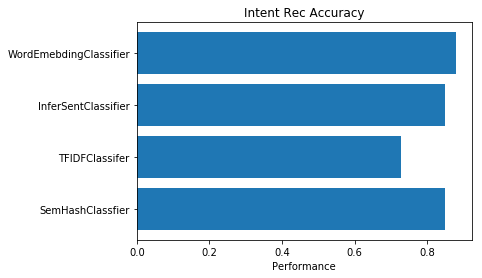

In [14]:
fig, ax = plt.subplots()
ax.barh(df['Name'], df['Accuracy'], align='center')
ax.set_yticklabels(df['Name'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Intent Rec Accuracy')

## Conclusion

We compare several different sentence embeding for intent classification.
1. Simple sum of wordembeding, 
2. Facebook InferSent.
3. TF-IDF
4. Semhash, https://arxiv.org/abs/1810.07150

### Simple sum the word embeding achieve the best accuray in intention classification.
This is quiet interesting. Why could simple sum of wording embeding represent the sentence very well?